****Mask Image Classification¶****

Given images of people with and without masks, let's try to classify if there is a mask in a given image.

We will use a TensorFlow/Keras CNN to make our predictions.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

****Load Data****

In [11]:
train_dir = '/kaggle/input/face-mask-detection-dataset/maskdata/maskdata/train'
test_dir = '/kaggle/input/face-mask-detection-dataset/maskdata/maskdata/test'

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                 validation_split = 0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [13]:
train_images = train_generator.flow_from_directory(train_dir,
                                                  target_size = (224, 224),
                                                  color_mode = 'rgb',
                                                class_mode = 'binary',
                                                  batch_size = 32,
                                                  shuffle = True,
                                                  seed = 42,
                                                  subset = 'training')
val_images = train_generator.flow_from_directory(train_dir,
                                                  target_size = (224, 224),
                                                  color_mode = 'rgb',
                                                class_mode = 'binary',
                                                  batch_size = 32,
                                                  shuffle = True,
                                                  seed = 42,
                                                  subset = 'validation')
test_images = test_generator.flow_from_directory(test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


**TRAINING**

In [14]:
inputs = tf.keras.Input(shape = (224, 224, 3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 64)               0   

2022-10-17 10:46:30.353833: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.

In [15]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history  = model.fit(train_images,
                    validation_data = val_images,
                    epochs = 100,
                    callbacks = [
                        tf.keras.callbacks.EarlyStopping(
                        monitor = 'val_loss',
                        patience = 5,
                        restore_best_weights = True,
                        )
                    ])

Epoch 1/100
16/16 [==============================] - 27s 2s/step - loss: 0.6823 - accuracy: 0.5456 - val_loss: 0.6823 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 25s 2s/step - loss: 0.6789 - accuracy: 0.5538 - val_loss: 0.6765 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 26s 2s/step - loss: 0.6750 - accuracy: 0.5619 - val_loss: 0.6731 - val_accuracy: 0.5691
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 0.6700 - accuracy: 0.5659 - val_loss: 0.6643 - val_accuracy: 0.5772
Epoch 5/100
16/16 [==============================] - 26s 2s/step - loss: 0.6642 - accuracy: 0.5963 - val_loss: 0.6524 - val_accuracy: 0.6179
Epoch 6/100
16/16 [==============================] - 25s 2s/step - loss: 0.6432 - accuracy: 0.6714 - val_loss: 0.6747 - val_accuracy: 0.4878
Epoch 7/100
16/16 [==============================] - 26s 2s/step - loss: 0.6412 - accuracy: 0.6207 - val_loss: 0.6106 - val_accuracy: 0.6992
Epoch 8/100
1

In [16]:
results = model.evaluate(test_images, verbose = 0)
print(" Loss {:.5f}".format(results[0]))
print(" Accuracy{:.5f}".format(results[1] * 100))

 Loss 0.32655
 Accuracy88.88889


**Vizualize Results**

In [17]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

sample_images = sample_generator.flow_from_directory(test_dir,
                                                    target_size = (224, 224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary',
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    seed = 42)

Found 198 images belonging to 2 classes.


1/1 [==============================] - 1s 526ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

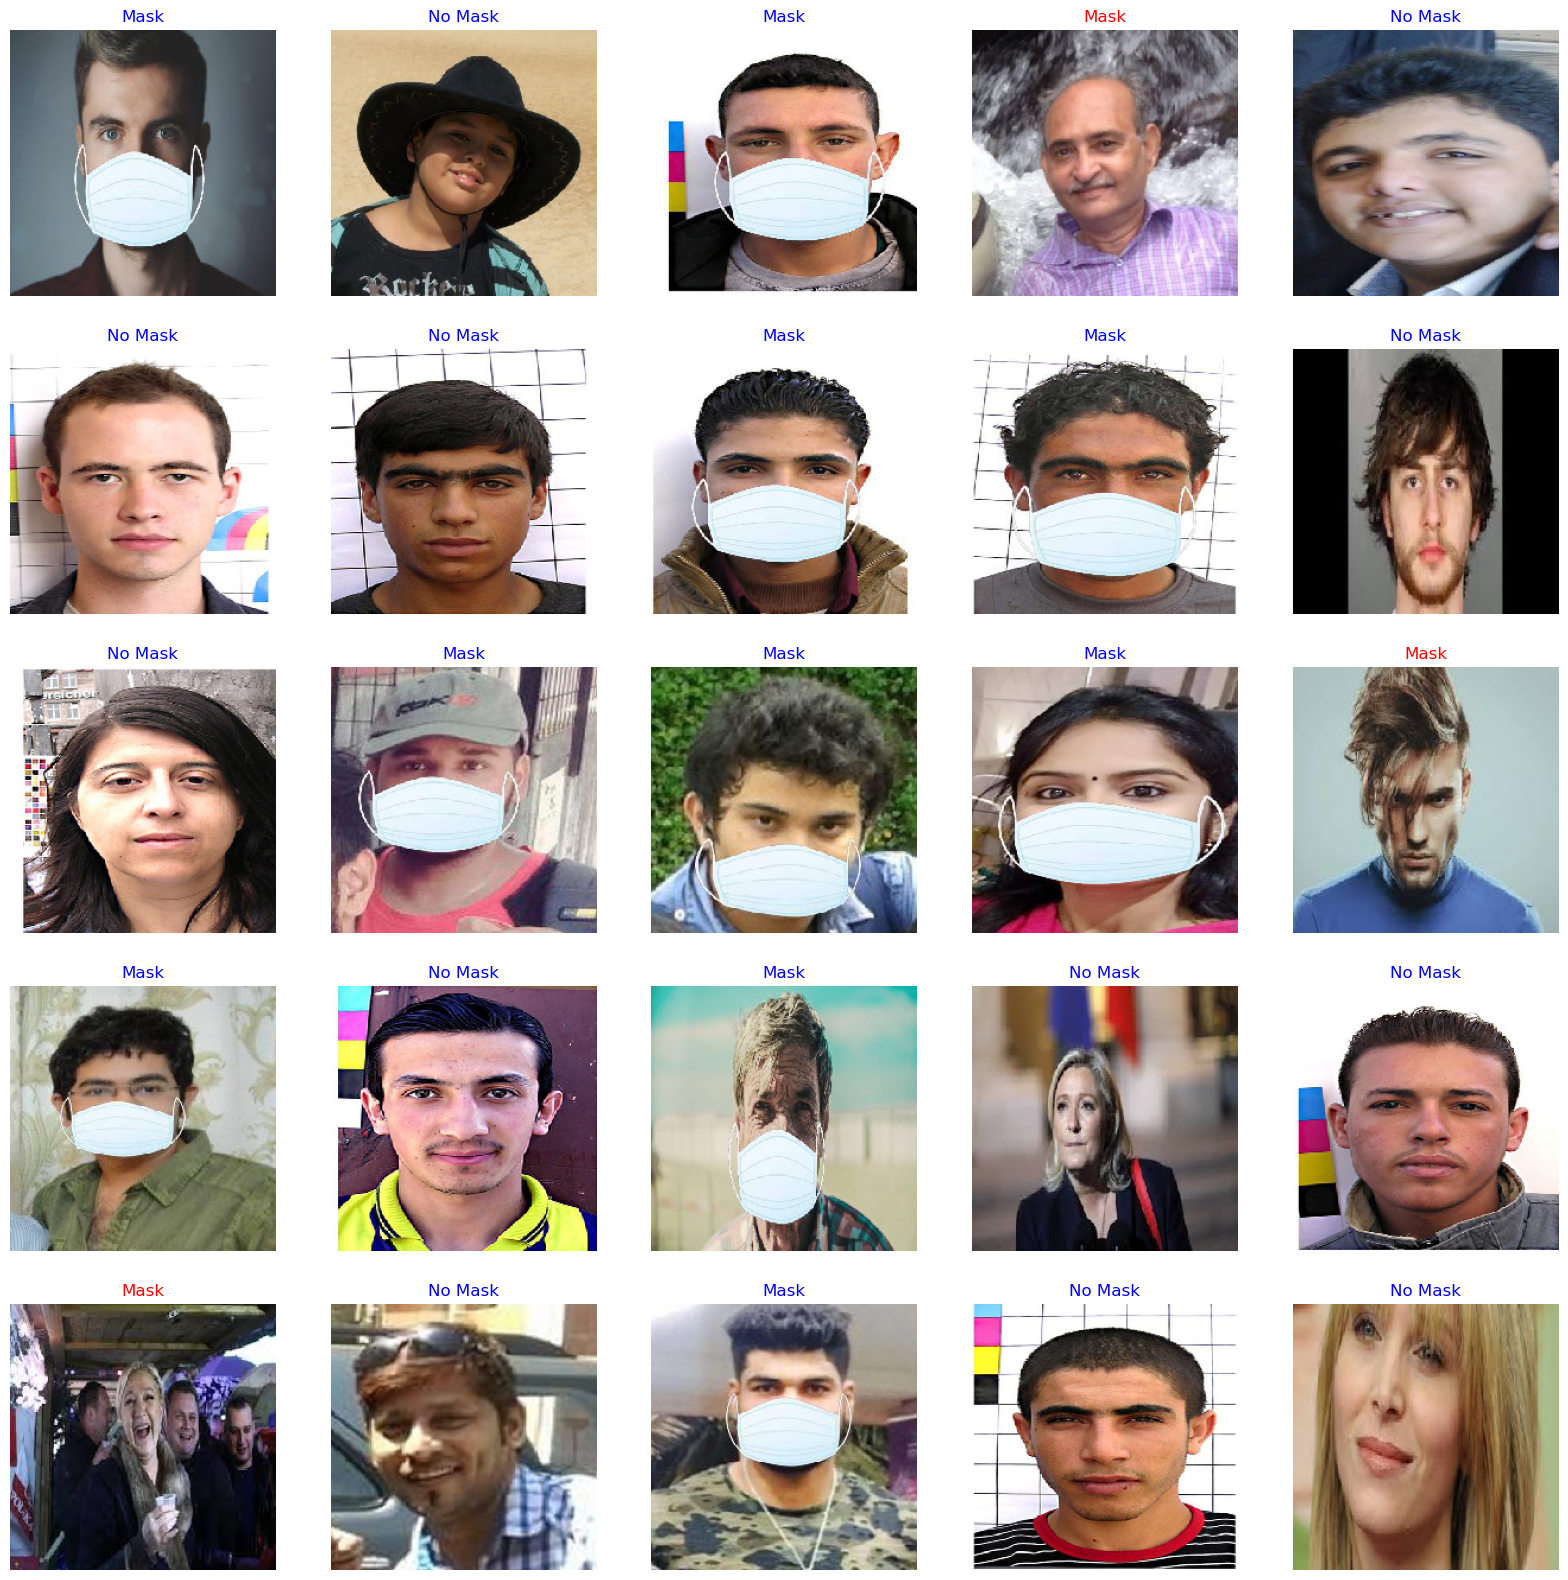

In [18]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize = (20, 20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("No Mask" if predictions[i] == 1 else "Mask"), color=('blue' if labels[i] == predictions[i] else 'red'))
plt.show()

****Further applications:****

A mask detector like this one can be used in security cameras and only allow entry of those individuals who have a mask on. It will be extremely beneficial and can even lessen the transmission rate. Another application can be identifying the people wearing masks and not wearing masks in an epicentre of corona virus so as to examine the circumstances and analyse if wearing a mask is really beneficial or not.